# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


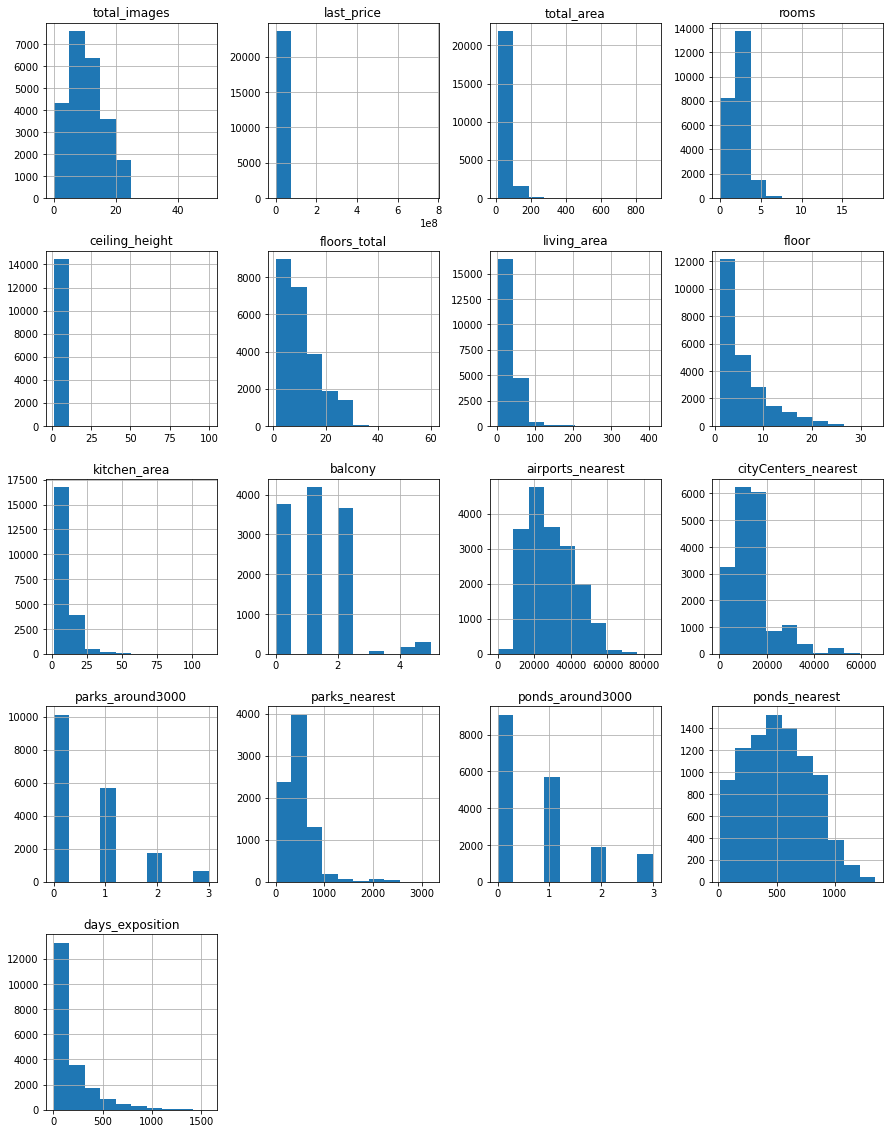

In [58]:
import pandas as pd
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
data.info()
data.hist(figsize=(15, 20))
data.head()

#### Вывод:  
Файл существует.  
С первого взгляда видно, что в данных присутствуют пропуски и неожиданные значения.

### Предобработка данных

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

По основной информации из таблицы видно, что пропущенные данные присутствуют в столбцах 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'.

In [60]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.median(numeric_only=True)['ceiling_height'])

Не ясно, почему отсутствует высота потолка. Возможно, она просто не измерялась при составлении объявления. Пропущенных данных в этом столбце слишком много, чтобы избавляться от всех строк с пропусками. Видно, что присутствуют аномальные значения (100 метров). К этому вернемся позже. Пропуски заполним медианным значением.

In [61]:
data[data['floors_total'].isna()]['floor'].unique()

array([ 4,  1, 12,  8,  9, 22, 15,  6,  7,  3, 18, 13, 24, 21, 11,  2,  5,
       19, 20, 14, 17, 23, 10])

Видно, что высота квартиры при пропущенной высоте дома может быть любой. Возможно, это верхний этаж, но эту гипотезу нам не проверить. Заполним пропущенное значениями из floor.

In [62]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data.loc[data['floors_total'].isna(), 'floor']

'living_area',  'kitchen_area' - неизвестно откуда пропуски. Заполним медианным значением:

In [63]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.median(numeric_only=True)['kitchen_area'])
data['living_area'] = data['living_area'].fillna(data.median(numeric_only=True)['living_area'])

In [64]:
data.drop(columns = ['is_apartment'], axis = 1, inplace=True)

Столбец is_apartment имеет булев тип данных, и данных этих катастрофически мало. По ним нельзя сделать выводов. Удалим этот столбец.

In [65]:
data['balcony'] = data['balcony'].fillna(0)

Будем считать, что если балкон не указан, то его нет, ведь наличие балкона это преимущество при продаже, было бы странно его не указать, если он есть.

In [66]:
data.dropna(axis=0, subset=['locality_name'], inplace=True)

'locality_name' - строка, и пропущенных строк не так много. Удалим их без ущерба для анализа.

In [67]:
data['airports_nearest'].count()

18116

Пропущенных значений слишком много, чтобы удалять строки, но слишком мало, чтобы удалять столбец. Оставим как есть. Скорее всего, аэропорта рядом просто нет.

In [68]:
data[(data['cityCenters_nearest'].isna()) & (data['airports_nearest'].isna())].count()['total_images']

5510

Интересно, что данные по ближайшему торговому центру отсутствуют там же, где по ближайшему аэропорту. Возможно их нет поблизости, а возможно люди не стали их заполнять в силу неудобства

In [69]:
data[(data['cityCenters_nearest'].isna()) & (data['parks_around3000'].isna())].count()['total_images']

5510

То же самое справедливо для парков.

In [70]:
data[(data['cityCenters_nearest'].isna()) & (data['ponds_around3000'].isna())].count()['total_images']

5510

И прудов. Заполним значения для парков и прудов нулями.

In [71]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [72]:
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

Что касается дней размещения, возможно, это баг. А возможно, объявление всё ещё висит. Необходимо уточнить у разработчиков. Пока заполним заведомо большим числом.

In [73]:
data['days_exposition'].fillna(732, inplace=True)

In [74]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Данные надо поменять в столбцах:  
1. first_day_exposition - на дату
2. floors_total - на int64
3. balcony - на int64
4. parks_around3000 - на int64
5. ponds_around3000 - на int64
6. days_exposition - на int64  
1 - это дата, далее - это количество. количество не может быть дробным.  
Проделаем замену:

Данные надо поменять в столбцах:  
1. first_day_exposition - на дату
2. floors_total - на int64
3. balcony - на int64
4. parks_around3000 - на int64
5. ponds_around3000 - на int64
6. days_exposition - на int64  
1 - это дата, далее - это количество. количество не может быть дробным.  
Проделаем замену:

In [75]:
import numpy as np
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S") #2019-03-07T00:00:00

data = data.astype({'floors_total' : 'int',
                    'balcony': 'int',
                   'parks_around3000': 'int',
                   'ponds_around3000': 'int',
                   'days_exposition' : 'int'})

data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                  int64
dtype: object

In [76]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Посмотрим, какие есть дубликаты названий населенных пунктов:  
1. 'посёлок Мурино' - 'поселок Мурино'
2. 'городской поселок Янино-1' - 'городской посёлок Янино-1'
3. 'поселок Бугры' - 'посёлок Бугры'  
Видно, что выявленные дубликаты вызваны заменой буквы е на ё. Приведём всё к единообразию через функцию:

In [77]:
data['locality_name'] = data['locality_name'].apply(lambda name: name.replace('ё', 'е'))
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Будогощь',
 'городской поселок Виллози',
 'городской поселок Лесогорский',
 'городской поселок Мга',
 'городской поселок Назия',
 'городской поселок Новоселье',
 'городской поселок Павлово',
 'городской поселок Рощино',
 'городской поселок Свирьстрой',
 'городской поселок Советский',
 'городской поселок Федоровское',
 'городской поселок Янино-1',
 'деревня

Уже лучше, но остались дубликаты вида:  
1. 'поселок при железнодорожной станции Вещево' - 'поселок станции Вещево',
2. 'коттеджный поселок Лесное' - 'поселок Лесное',
3. 'поселок Рябово' - 'поселок городского типа Рябово',  
Избавимся от них тем же методом, отсекая лишнее:

In [78]:
data['locality_name'] = data['locality_name'].apply(lambda name: name.replace(' при железнодорожной', ''))
data['locality_name'] = data['locality_name'].apply(lambda name: name.replace('коттеджный ', ''))
data['locality_name'] = data['locality_name'].apply(lambda name: name.replace(' городского типа', ''))
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалево',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Будогощь',
 'городской поселок Виллози',
 'городской поселок Лесогорский',
 'городской поселок Мга',
 'городской поселок Назия',
 'городской поселок Новоселье',
 'городской поселок Павлово',
 'городской поселок Рощино',
 'городской поселок Свирьстрой',
 'городской поселок Советский',
 'городской поселок Федоровское',
 'городской поселок Янино-1',
 'деревня

Больше дубликатов не выявлено.

Займемся редкими и выбивающимися значениями (аномалиями) во всех столбцах. Ещё раз взглянем на гистограммы и пойдём по порядку:

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_exposition'

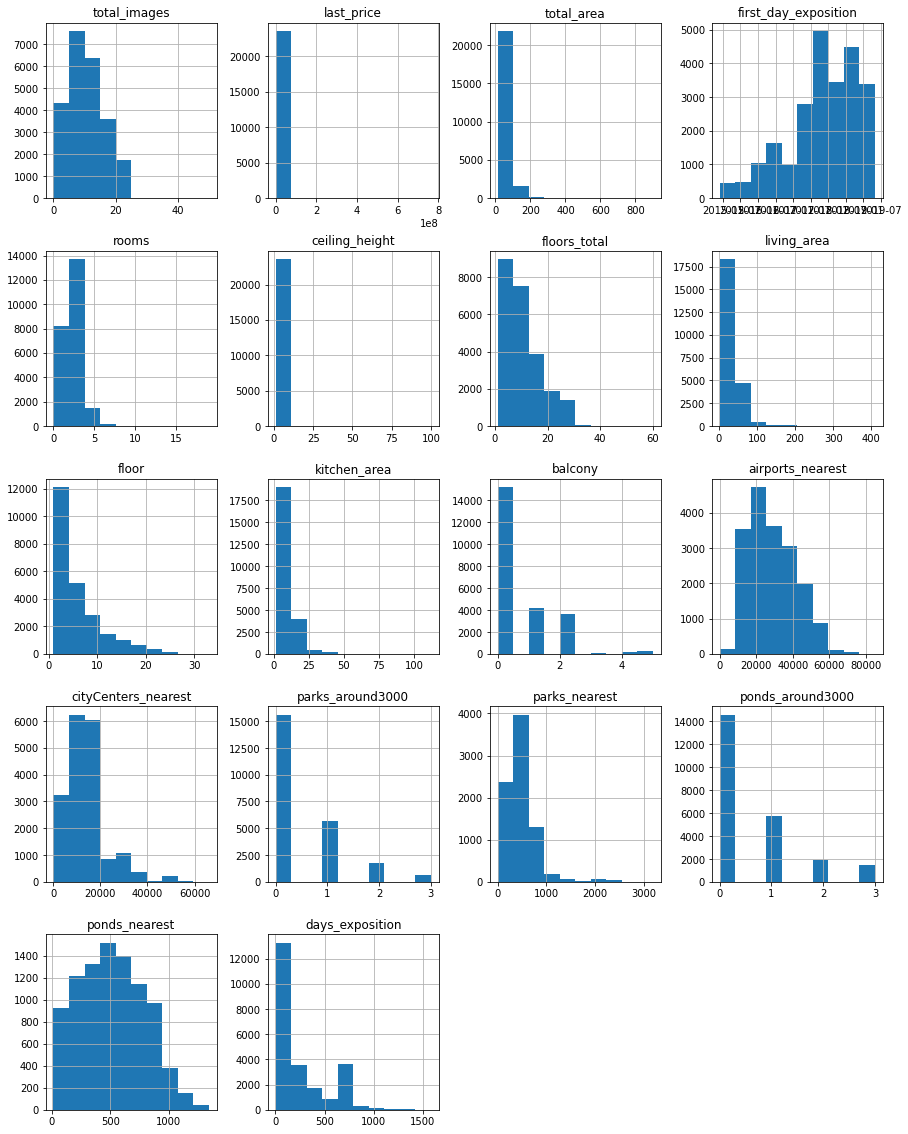

In [79]:
data.hist(figsize=(15, 20))

In [80]:
sorted(data['total_images'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 35,
 37,
 39,
 42,
 50]

50 фото - необычно, но нельзя сказать, что аномально. Пусть будут.

In [81]:
print(sorted(data['last_price'].unique()))

[12190.0, 430000.0, 440000.0, 450000.0, 470000.0, 480000.0, 490000.0, 500000.0, 520000.0, 530000.0, 550000.0, 560000.0, 565000.0, 580000.0, 585000.0, 590000.0, 600000.0, 620000.0, 630000.0, 650000.0, 660000.0, 680000.0, 690000.0, 700000.0, 710000.0, 720000.0, 730000.0, 740000.0, 750000.0, 760000.0, 770000.0, 777000.0, 780000.0, 790000.0, 799000.0, 800000.0, 820000.0, 850000.0, 860000.0, 869000.0, 870000.0, 880000.0, 890000.0, 900000.0, 910000.0, 920000.0, 945750.0, 950000.0, 965780.0, 970000.0, 980000.0, 990000.0, 995000.0, 999000.0, 999999.0, 1000000.0, 1010000.0, 1020000.0, 1030000.0, 1050000.0, 1060000.0, 1070000.0, 1080000.0, 1090000.0, 1099000.0, 1100000.0, 1110000.0, 1130000.0, 1150000.0, 1170000.0, 1180000.0, 1190000.0, 1199000.0, 1200000.0, 1220000.0, 1230000.0, 1240000.0, 1249000.0, 1250000.0, 1260000.0, 1270000.0, 1280000.0, 1290000.0, 1300000.0, 1310000.0, 1315000.0, 1320000.0, 1330000.0, 1350000.0, 1353000.0, 1360000.0, 1370000.0, 1380000.0, 1390000.0, 1399000.0, 1400000.0,

Квартиры за 763 миллиона - бывают, конечно, но скорее всего это лишние два нуля в цене. Проверим, посмотрев на данные об этой квартире:

In [82]:
data.query('last_price>=150000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3,190.0,3,False,...,63.0,2,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,732
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.0,5,False,...,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233
2536,16,159984000.0,242.4,2015-08-27,4,3.85,9,131.0,7,False,...,20.0,0,Санкт-Петербург,21946.0,2242.0,1,679.0,1,227.0,501
5893,3,230000000.0,500.0,2017-05-31,6,2.65,7,30.0,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,50
7857,11,150000000.0,230.0,2017-10-25,8,2.65,8,220.0,8,False,...,9.1,0,Санкт-Петербург,25525.0,5845.0,2,116.0,0,NaN,135
8900,13,190870000.0,268.0,2016-03-25,3,2.65,8,132.0,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,901
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10,250.0,10,False,...,9.1,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7,218.0,7,False,...,40.0,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,199
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9,204.0,9,False,...,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393
15016,8,150000000.0,500.0,2016-01-13,4,3.20,7,30.0,7,False,...,9.1,0,Санкт-Петербург,33058.0,6150.0,3,209.0,3,531.0,303


По состоянию на конец марта 2022 года, средневзвешенная стоимость квадратного метра в СПб на первичном рынке жилья (включая комфорт-, бизнес- и премиум-классы) составила 247 тыс. руб.
Если площадь - действительно 400 квадратных метров, данные правдоподобны. Видимо, это какое-то элитное жильё. Но таких квартир слишком мало, чтобы делать хоть какие-то выводы. Устраним их из данных.

In [83]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Видно, что 75% отстают от максимума на несколько порядков. Помимо того, минимум - всего 12 тысяч рублей, что тоже абсурд. Наши данные - о продаже жилья, а не об аренде. Данные меньше миллиона и больше 10 миллионов можно с чистой совестью исключать.

<AxesSubplot:>

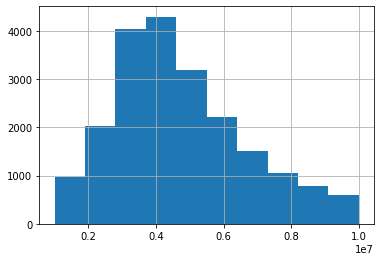

In [84]:
data = data.query('1000000<=last_price<=10000000')
data['last_price'].hist()

Выглядит здраво. Идём дальше.

count    20712.000000
mean        52.203820
std         17.817222
min         12.000000
25%         38.800000
50%         48.300000
75%         62.100000
max        201.500000
Name: total_area, dtype: float64

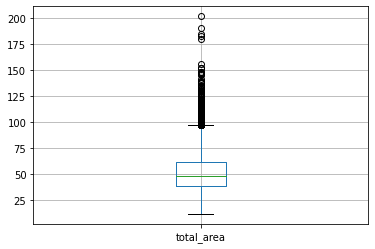

In [85]:
data.boxplot('total_area')
data['total_area'].describe()

Видно, что квартиры больше 100 квадратов - единичные случаи. Смело отбросим их. 

<AxesSubplot:>

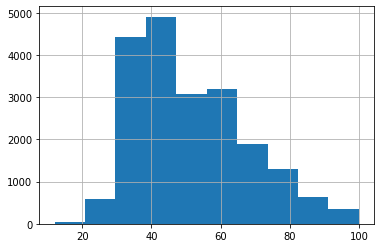

In [86]:
data = data.query('total_area<=100')
data['total_area'].hist()

Неплохо. Идём дальше.

<AxesSubplot:>

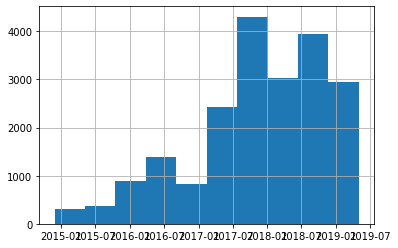

In [87]:
data['first_day_exposition'].hist()

Здесь нет ничего подозрительного. Можно отметить, что со временем сервис становился популярнее.

In [88]:
data['rooms'].describe()

count    20422.000000
mean         1.875331
std          0.866501
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: rooms, dtype: float64

In [89]:
pd.pivot_table(data, index='rooms', values='last_price', aggfunc='count')

,last_price
rooms,
0,194
1,7868
2,7262
3,4520
4,546
5,30
6,2


0 комнат - нежилое помещение либо некорректные данные. 5 и 6 комнат - слишком редки. отбросим их.

In [90]:
data = data.query('1<=rooms<=4')
data['rooms'].describe()

count    20196.000000
mean         1.888295
std          0.842072
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64

Стало лучше. Идём дальше.

In [91]:
pd.pivot_table(data, index='ceiling_height', values='last_price', aggfunc='count')

,last_price
ceiling_height,
1.00,1
1.20,1
1.75,1
2.00,10
2.20,1
...,...
25.00,7
26.00,1
27.00,7


In [92]:
data['ceiling_height'].describe()

count    20196.000000
mean         2.690363
std          0.788231
min          1.000000
25%          2.600000
50%          2.650000
75%          2.650000
max         32.000000
Name: ceiling_height, dtype: float64

По нормативам, высота потолка не может быть менее 2.5 метров. Значения меньше можно отбросить, это не жильё (гараж?). Что касается аномально высоких потолков, возможно, имелась ввиду величина в 10 раз меньше (32 метра - 3.2 метра, стандарт) 

In [93]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x if x<=10 else x/10)
data = data.query('ceiling_height>=2.5')
data['ceiling_height'].describe()

count    20119.000000
mean         2.666324
std          0.184858
min          2.500000
25%          2.600000
50%          2.650000
75%          2.650000
max          8.300000
Name: ceiling_height, dtype: float64

Уже лучше. Посмотрим на гистограмму. Если остались аномальные значения, то их уже точно не исправить. Удалим.

<AxesSubplot:>

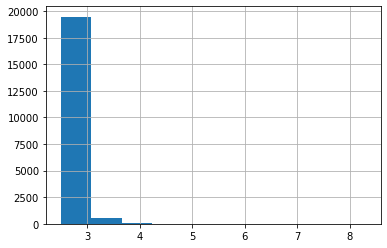

In [94]:
data['ceiling_height'].hist(bins=10)

In [95]:
pd.pivot_table(data, index='ceiling_height', values='last_price', aggfunc='count').tail(50)

,last_price
ceiling_height,
3.30,61
3.31,2
3.32,1
3.33,2
3.34,1
3.35,4
3.37,1
3.38,4
3.40,35


Отбросим значения выше 3.50

In [96]:
data = data.query('ceiling_height<=3.50')

Идём дальше.

In [97]:
pd.pivot_table(data, index='floors_total', values='last_price', aggfunc='count')

,last_price
floors_total,
1,19
2,290
3,524
4,879
5,5045
6,546
7,362
8,228
9,3604


Самый высокий жилой дом Петербурга – 37 этажей. То есть, в данные точно закрались ошибки. Об этом стоит сказать разработчикам. Но даже так, отрежем по 27.

In [98]:
data = data.query('floors_total<=27')

Идём дальше. 'living area'. Нужно проверить, что она не больше total area:

In [99]:
len(data)-len(data.query('living_area<=total_area'))

62

Такие значения есть, их немного, но они явно некорректны. Удалим их.

In [100]:
data = data.query('living_area<=total_area')

Теперь разберемся с аномальными значениями:

In [101]:
data['living_area'].describe()

count    19917.000000
mean        29.438613
std         11.418499
min          2.000000
25%         18.300000
50%         30.000000
75%         36.900000
max         80.000000
Name: living_area, dtype: float64

<AxesSubplot:>

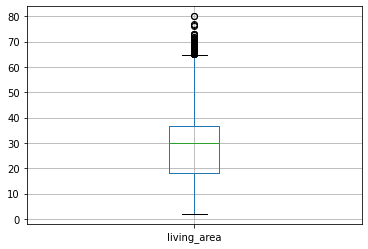

In [102]:
data.boxplot('living_area')

18 метров - жилплощадь стандартной однокомнатной квартиры. Что касается верхней планки, доверимся верхней границе "усов".

In [103]:
data = data.query('18<=living_area<=65')

Идём дальше. floor. к нему вопрос один  - быть не выше верхнего.

In [104]:
data = data.query('floor<=floors_total')

Идём дальше. Площадь кухни. Помимо очевидного, суммарная с жилой площадь не должна быть больше общей.

count    15441.000000
mean         9.320962
std          3.368088
min          1.300000
25%          7.000000
50%          9.000000
75%         10.800000
max         48.300000
Name: kitchen_area, dtype: float64


<AxesSubplot:>

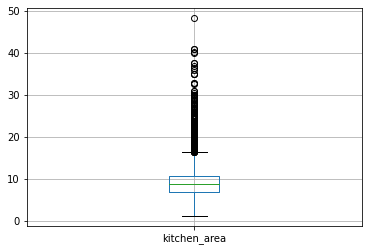

In [105]:
data = data.query('living_area+kitchen_area<=total_area')
print(data['kitchen_area'].describe())
data.boxplot('kitchen_area')

Доверимся границам усов.

In [106]:
data = data.query('kitchen_area<=17')

К остальным столбцам больших вопросов не осталось.

In [81]:
data.duplicated().sum()

0

In [108]:
data.drop_duplicates(inplace = True)
data = data.reset_index(drop=True)

#### Вывод:  
В ходе предобработки были устранены пропуски и аномальные значения в данных, а также переработаны типы данных в самой таблице. Природа части проблем осталась невыявленной и требует проведения консультации с разработчиками. (Например, отсутствие дня снятия объявления.)

### Посчитайте и добавьте в таблицу новые столбцы

 посчитано и добавлено в таблицу: цена одного квадратного метра:

In [109]:
data['per_meter'] = data['last_price']/data['total_area']

посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.):

In [110]:
data['publication_day'] = data['first_day_exposition'].dt.weekday

посчитано и добавлено в таблицу: месяц публикации объявления:

In [111]:
data['publication_month'] = data['first_day_exposition'].dt.month

посчитано и добавлено в таблицу: год публикации объявления:

In [112]:
data['publication_year'] = data['first_day_exposition'].dt.year

посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»):

In [113]:
data['floor_type'] = data.apply(lambda row: 'первый' if row['floor']==1 else
                                'последний' if row['floor']==row['floors_total'] else 'другой', axis=1)

посчитано и добавлено в таблицу: расстояние в км до центра города:

In [114]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()

#### Вывод:  
Данные для проведения исследования готовы.

### Проведите исследовательский анализ данных

изучим и опишем следующие параметры: - общая площадь; - жилая площадь; - площадь кухни; - цена объекта; - количество комнат; - высота потолков; - этаж квартиры; - тип этажа квартиры («первый», «последний», «другой»); - общее количество этажей в доме; - расстояние до центра города в метрах; - расстояние до ближайшего аэропорта; - расстояние до ближайшего парка; - день и месяц публикации объявления.  
 - общая площадь:

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

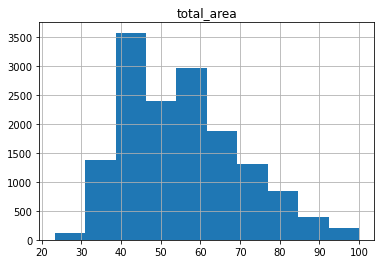

In [115]:
data.hist('total_area')

Всплески у 40 и 60 метров понятны - это стандартные одно-двухкомнатные квартиры.

 - жилая площадь

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

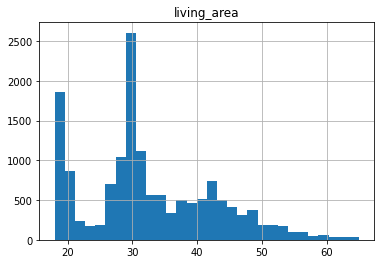

In [116]:
data.hist('living_area', bins=30)

Два бугра также понятны, это одно- и двух- комнатные квартиры

- площадь кухни:

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

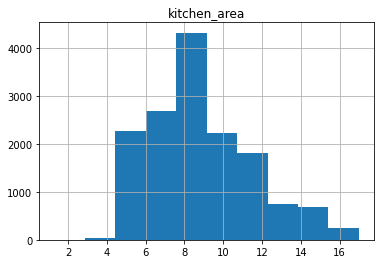

In [117]:
data.hist('kitchen_area')

Ожидаемый график, обычная кухня составляет около 8 метров.

 - цена объекта:

count    1.505700e+04
mean     4.903429e+06
std      1.889523e+06
min      1.000000e+06
25%      3.600000e+06
50%      4.658410e+06
75%      6.000000e+06
max      1.000000e+07
Name: last_price, dtype: float64

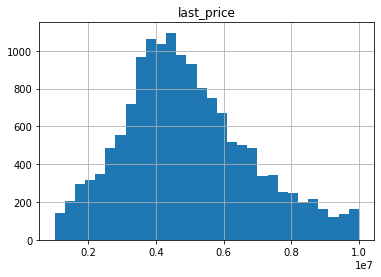

In [118]:
data.hist('last_price', bins=30)
data['last_price'].describe()

График выглядит правдоподобно, средняя цена квартиры около 5 миллионов

 - количество комнат:

count    15057.000000
mean         2.129840
std          0.789189
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64

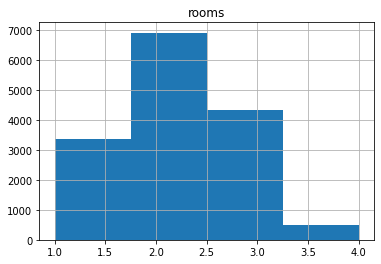

In [119]:
data.hist('rooms', bins=4)
data['rooms'].describe()

Можно заметить, что трёхкомнатных квартир достаточно много, однако их не было видно на предыдущих графиках. Скорее всего, это связано с тем, что трёхкомнатные не имеют стандартного метража, из-за чего третий горб более плавный.  
 - высота потолков:

count    15057.000000
mean         2.660219
std          0.153170
min          2.500000
25%          2.560000
50%          2.650000
75%          2.650000
max          3.500000
Name: ceiling_height, dtype: float64

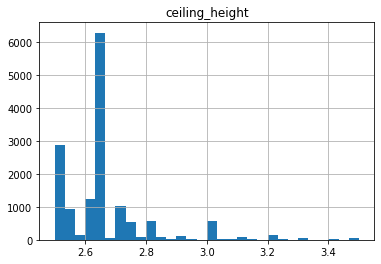

In [120]:
data.hist('ceiling_height', bins=30)
data['ceiling_height'].describe()

Подавляющее число квартир имеют потолок 2.5 метра, даже 3 - 3.2 встречаются крайне редко.  
 - этаж квартиры:

count    15057.000000
mean         5.502623
std          4.489317
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         27.000000
Name: floor, dtype: float64

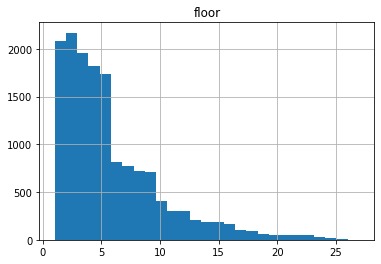

In [121]:
data.hist('floor', bins=27)
data['floor'].describe()

Практически эталонное распределение Пуассона. Пара резких спадов связаны со стандартными пяти- и девяти- этажками.
 - тип этажа квартиры («первый», «последний», «другой»):

In [122]:
data.groupby('floor_type').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,per_meter,publication_day,publication_month,publication_year,cityCenters_nearest_km
floor_type,,,,,,,,,,,,,,,,,,,,,
другой,10815,10815,10815,10815,10815,10815,10815,10815,10815,10815,...,10815,3407,10815,3936,10815,10815,10815,10815,10815,8553
первый,2083,2083,2083,2083,2083,2083,2083,2083,2083,2083,...,2083,674,2083,647,2083,2083,2083,2083,2083,1425
последний,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159,...,2159,696,2159,738,2159,2159,2159,2159,2159,1458


<AxesSubplot:>

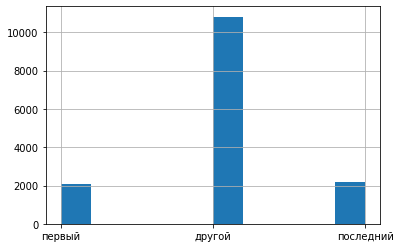

In [127]:
data['floor_type'].hist()

Первый и последний этажи равны по количеству и продаются также часто как любые другие.  
(Я не знаю как построить гистограмму в этом случае. После группировки категории становятся индексами.)  
 - общее количество этажей в доме:

count    15057.000000
mean        10.076642
std          6.078850
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         27.000000
Name: floors_total, dtype: float64

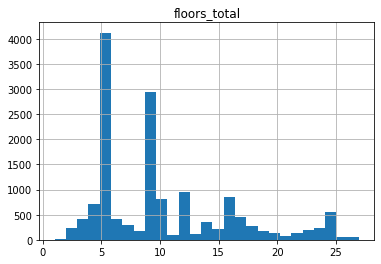

In [64]:
data.hist('floors_total', bins=27)
data['floors_total'].describe()

5, 9, 12 и 24 этажа - знакомые всем стандарты. Их мы и видим.  
 - расстояние до центра города в метрах:

count    11436.000000
mean     15201.044246
std       8569.997484
min        329.000000
25%      10879.000000
50%      13678.000000
75%      16655.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

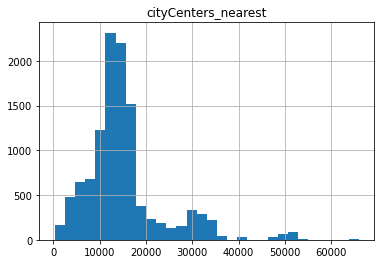

In [65]:
data.hist('cityCenters_nearest', bins=30)
data['cityCenters_nearest'].describe()

Большинство квартир в 10-16 километрах от центра. Вполне правдоподобно для Петербурга. Дальше идёт хвост, уходящий куда-то в пригород.
 - расстояние до ближайшего аэропорта:

count    11424.000000
mean     28876.607405
std      12943.290488
min          0.000000
25%      17843.000000
50%      27345.500000
75%      37500.250000
max      84869.000000
Name: airports_nearest, dtype: float64

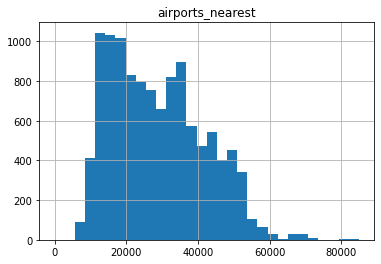

In [66]:
data.hist('airports_nearest', bins=30)
data['airports_nearest'].describe()

Аэропорты Пулково и Горелово расположены диаметрально противоположно от центра Петербурга, поэтому расстояние не превосходит радиуса Питера в 67 километров. Около нуля значений нет - аэропорт стоит в поле. Всё логично.
 - расстояние до ближайшего парка:

count    4777.000000
mean      485.449864
std       314.193627
min         1.000000
25%       298.000000
50%       458.000000
75%       611.000000
max      3064.000000
Name: parks_nearest, dtype: float64

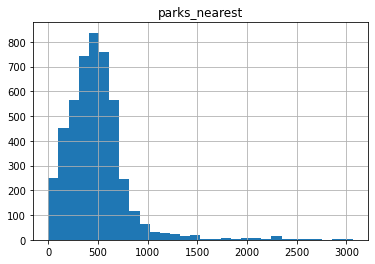

In [67]:
data.hist('parks_nearest', bins=30)
data['parks_nearest'].describe()

Парк почти всегда не более чем в километре от дома, что суть шаговая доступность. Хорошо. Вряд ли этот параметр будет на что-то влиять, если парк не прямо перед окном.
 - день и месяц публикации объявления:

count    15057.000000
mean         2.572956
std          1.791357
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: publication_day, dtype: float64


count    15057.000000
mean         6.372717
std          3.497231
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: publication_month, dtype: float64

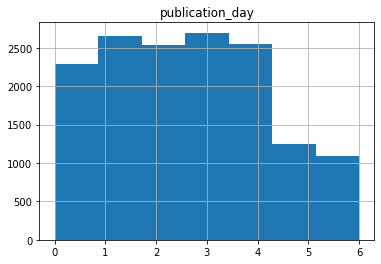

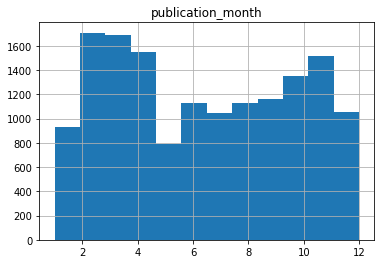

In [68]:
data.hist('publication_day', bins=7)
print(data['publication_day'].describe())
data.hist('publication_month', bins=12)
data['publication_month'].describe()

Чаще объявления дают весной и осенью в будние дни.

выполним задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.  
   - Постройте гистограмму.  
   - Посчитайте среднее и медиану.  
   - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

<AxesSubplot:>

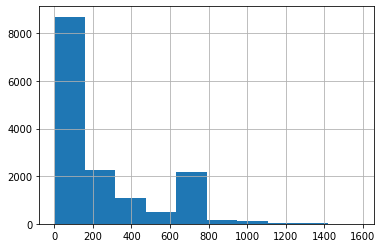

In [69]:
data['days_exposition'].hist()

Второй пик - значения, которые я вписал на место отсутствующих. Видимо это было неправильно, и теперь они будут мешать среднему и медиане. Чтобы не учитывать их, возьмем срез до 700 дней, и будем работать с ним.

<AxesSubplot:>

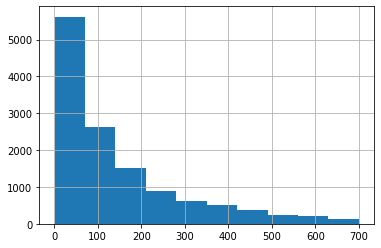

In [70]:
exposition_slice = data[data['days_exposition']<=700]['days_exposition']
exposition_slice.hist()

In [71]:
exposition_slice.describe()

count    12692.000000
mean       143.750236
std        147.966293
min          1.000000
25%         43.000000
50%         87.000000
75%        196.000000
max        700.000000
Name: days_exposition, dtype: float64

Среднее - 143 дня, медиана - 87 дней.

<AxesSubplot:>

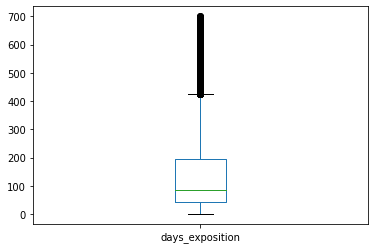

In [72]:
exposition_slice.plot.box()

В среднем продажа занимает от месяца до полугода. Значения меньше месяца можно считать быстрыми, больше 400 дней - долгими.

 выполним задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."  
 - общей площади;  
 - жилой площади;  
 - площади кухни;  
 - количество комнат;  
 - типа этажа, на котором расположена квартира (первый, последний, другой);  
 - даты размещения (день недели, месяц, год).:

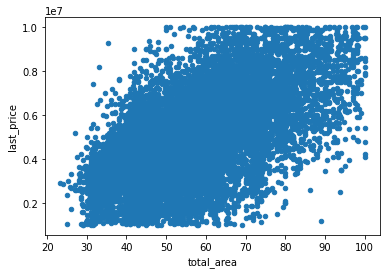

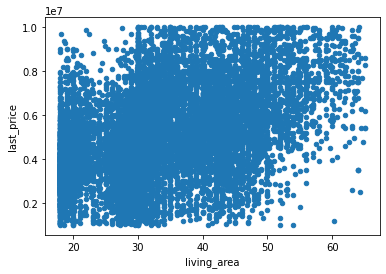

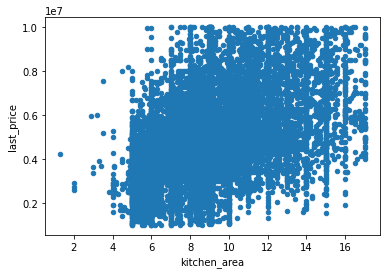

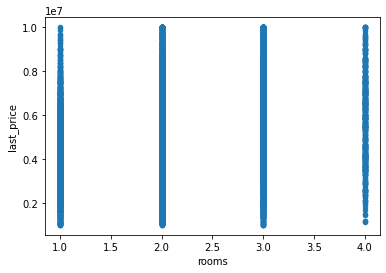

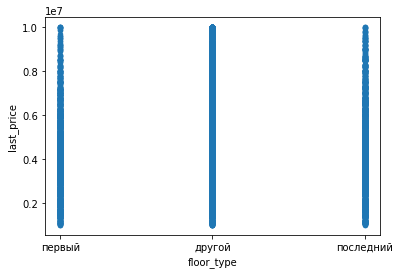

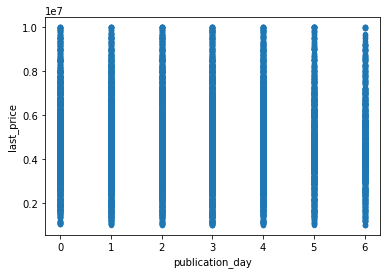

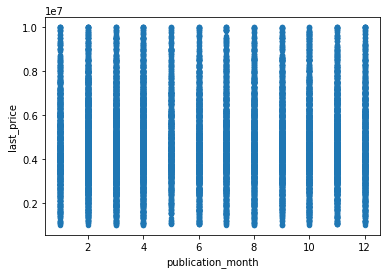

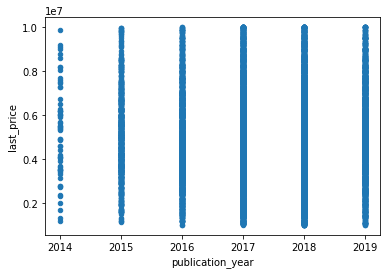

In [73]:
import matplotlib.pyplot as plt
for param in ('total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type',
              'publication_day', 'publication_month', 'publication_year'):
    data.plot(x=param, y='last_price', kind='scatter')
    plt.show()


In [76]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type',
              'publication_day', 'publication_month', 'publication_year']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,publication_day,publication_month,publication_year
last_price,1.000000,0.604052,0.449439,0.445647,0.297805,-0.011346,0.001395,0.030399
total_area,0.604052,1.000000,0.860439,0.417699,0.736894,-0.006160,0.008364,-0.049158
living_area,0.449439,0.860439,1.000000,0.110216,0.843039,-0.002174,0.001131,-0.037561
kitchen_area,0.445647,0.417699,0.110216,1.000000,-0.074264,-0.004609,0.021855,-0.041323
rooms,0.297805,0.736894,0.843039,-0.074264,1.000000,0.003565,0.000345,-0.019663
publication_day,-0.011346,-0.006160,-0.002174,-0.004609,0.003565,1.000000,0.009686,-0.000410
publication_month,0.001395,0.008364,0.001131,0.021855,0.000345,0.009686,1.000000,-0.269529
publication_year,0.030399,-0.049158,-0.037561,-0.041323,-0.019663,-0.000410,-0.269529,1.000000


Сильнее всего (с коэффициентом 0.6) на цену влияет общая площадь. Не многим меньше - жилая площадь и площадь кухни. Наблюдается зависимость от количества комнат, но она опять же обусловлена общей площадью. В целом, единственный действительно важный параметр - общая площадь жилья.

выполним задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."

In [77]:
locality = pd.pivot_table(data, index='locality_name', values='per_meter', aggfunc=['count','mean'])
locality = locality.sort_values(by=('count', 'per_meter'), ascending=False).head(10)
locality

,count,mean
,per_meter,per_meter
locality_name,,
Санкт-Петербург,9734,101851.259833
поселок Шушары,312,74986.432608
Всеволожск,287,65596.848253
Колпино,265,73061.389518
Пушкин,255,98735.876552
Гатчина,237,67609.427047
поселок Мурино,223,79334.369249
Выборг,171,57162.888937


In [78]:
locality['mean', 'per_meter'].describe()

count        10.000000
mean      78426.756426
std       14062.762640
min       57162.888937
25%       68972.417665
50%       77160.400929
75%       83498.513885
max      101851.259833
Name: (mean, per_meter), dtype: float64

Выделяющаяся цена квартир в Петербурге не удивительна. Удивительна их дешевизна в Выборге. 

выполним задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.":

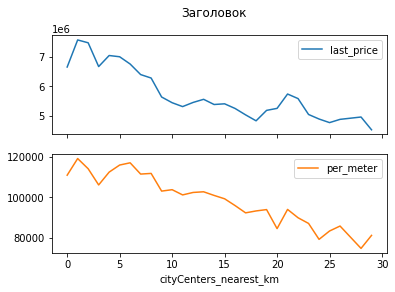

In [80]:
(pd.pivot_table(data[data['locality_name']=='Санкт-Петербург'],
               index='cityCenters_nearest_km', values=['last_price', 'per_meter'])
 .plot(subplots=True, title = 'Заголовок')
 
);


Цена квадратного метра, равно как и стоимость квартиры, падает с увеличением расстояния от центра Петербурга. Скачки на графиках очень схожи, значит, дело не в метраже квартиры - расстояние важно само по себе.

#### Вывод:  
Главными параметрами, отвечающими за стоимость квартиры, являются общая площадь и расстояние от центра.  
Квартира продается в срок от нескольких месяцев до полугода.  
Квартиры в Петербурге существенно дороже, чем в провинции.

### Общий вывод

В рамках исследования были обнаружены существенные проблемы и недочеты в сборе данных командой разработчиков Яндекс.Недвижимость.  
Совет: передать баг репорты разработчикам
Главными параметрами, отвечающими за стоимость квартиры, являются общая площадь и расстояние от центра.  
Квартира продается в срок от нескольких месяцев до полугода.  
Совет: предлагать хозяину буст объявления/отдельно отслеживать объявления, висящие дольше года.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод